# Regression and the age of the universe

## Import scientific python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Bivariate data

There are many examples in Earth and Planetary Science where we are interested in the dependence of one set of data on another (_bivariate data_). We have dealt with such scenarios thus far in considering the distance of the last geomagnetic reversal from the ridge crest to get spreading rate and the difference in arrival times of the $P$ and $S$ seismic waves is related to distance from the source to the receiver. 

Today we will be focused on methods that allow us to investigate potential associations and relationships between variables. And using a classic problem from astrophysics to do so. The inspiration for this exercise came from Lecture 16 of Lisa Tauxe's Python for Earth Science Students class and some of the material is modified from those materials (https://github.com/ltauxe/Python-for-Earth-Science-Students).

### Age of the universe

Today, we will focus on using the retreat velocity of galaxies and supernova as a function of their distance as our example data set. Such data underlies what has come to be known as "Hubble's Law" (same Hubble as for the Hubble telescope). Hubble published these results in 1929 [Hubble, E. P. (1929) Proc. Natl. Acad. Sci., 15, 168–173.]  At the time,  it was unclear whether the universe was static, expanding, or collapsing. Hubble hypothesized that if the universe were expanding, then everything in it would be moving away from us. The greater the distance between the Earth and the galaxy, the faster it must be moving.  So all that had to be done was to measure the distance and velocity of distant galaxies.  Easy-peasy - right?  

To measure velocity, Hubble made use of the doppler shift. To understand how this works, recall that the pitch you hear as an ambulance approaches changes. During doppler shift, the ambulance's pitch changes from high (as it approaches) to low (as it recedes). The pitch changes  because the relative frequency of the sound waves changes. The frequency increases as the ambulance approaches, leading to a higher pitch, and then decreases as it moves away, resulting in a lower pitch.  

Just in case you haven't had this life experience, let's listen to such a siren here:
https://www.youtube.com/watch?v=imoxDcn2Sgo

<img src="Images/Doppler_Effect.png" width=600>

The same principle applies to light, but rather than hear a change in frequency, we observe a shift in the wavelength (the color) emitted by the galaxy. If a star or galaxy is moving away from us, its absorption bands are shifted towards longer wavelengths - the red end of the visible spectrum. The faster the star or galaxy travels away from the observer, the greater the shift will be to the red:

<img src="Images/dopp-redshift01.jpg" width=300>

So a star (or galaxy) moving away from us will have a red shift with the wavelength being spread out.

<img src="Images/dopp-redshift02.jpg" width=300>

_[Figures from http://www.a-levelphysicstutor.com/wav-doppler.php](http://www.a-levelphysicstutor.com/wav-doppler.php)_

Hubble measured the red shift of different galaxies and converted them to velocities. He then estimated the distance to these objects, which is harder to do (and he was pretty far off). 

Improving such data was a major motivation of the Hubble Space Telescope. Those data and continued improvement to approaches for estimating these distances and velocities and investigating additional types of celestial objects is a major focus of ongoing research. 

## Type 1a supernovae data

Let's import data from Freedman et al. (2000) of the distance and retreat velocity of type 1a supernovae. These supernovae are described as follows in a review paper that Freedman wrote in 2010 (https://doi.org/10.1146/annurev-astro-082708-101829):

> One of the most accurate means of measuring cosmological distances out into the Hubble flow
utilizes the peak brightness of SNe Ia. The potential of supernovae for measuring distances was
clear to early researchers (e.g., Baade, Minkowski, Zwicky), but it was the Hubble diagram of
Kowal (1968) that set the modern course for this field, followed by decades of work by Sandage,
Tammann, and collaborators (e.g., Sandage & Tammann 1982, 1990; see also the review by
Branch 1998). Analysis by Pskovskii (1984), followed by Phillips (1993), established a correlation
between the magnitude of a SN Ia at peak brightness and the rate at which it declines, thus
allowing supernova luminosities to be “standardized.” This method currently probes farthest
into the unperturbed Hubble flow, and it possesses very low intrinsic scatter:
*Freedman and Madore (2010) who then go onto describe how using Cepheid variable stars (a type of pulsating star) has allowed for the distances to be better calibrated.*

> SNe Ia result from the thermonuclear runaway explosions of stars.
From observations alone, the presence of SNe Ia in elliptical galaxies suggests that they do not
come from massive stars. Many details of the explosion are not yet well understood, but the
generally accepted view is that of a carbon-oxygen, electron-degenerate, nearly-Chandrasekharmass
white dwarf orbiting in a binary system with a close companion *Freedman and Madore (2010)*

In [2]:
Supernova_data = pd.read_csv('Data/Freedman2000_Supernova1a.csv')
Supernova_data.tail()

,Supernova,VCMB,D(Mpc),HCMB,σ
31,SN1994T,10715,149.9,71.5,2.6
32,SN1995ac,14634,185.6,78.8,2.7
33,SN1995ak,6673,82.4,80.9,2.8
34,SN1996C,9024,136.0,66.3,2.5
35,SN1996bl,10446,132.7,78.7,2.7


The ```VCMB``` column is velocity relative to the cosmic microwave background in km s$^{-1}$. The ```D(Mpc)``` column is the distance in Mpc which is the unit typically used for these measurements. 1 Mpc =  3.09 x 10$^{19}$ km

Go ahead and double-click on this cell to see how I am getting labels that have the proper superscripts.

To create nice labels with superscripts, we can use latex formatting, which can also be done in a markdown cell.  For a superscript, first we need to encase the text in dollar signs and then use the ^ symbol to make the following text a superscript. If there is more than one number in the superscript, you must enclose what you want as the superscript in curly braces.
For example, to print $10^3$, we use ```$10^3$``` and for 'per second' (s$^{-1}$): ```s$^{-1}$```

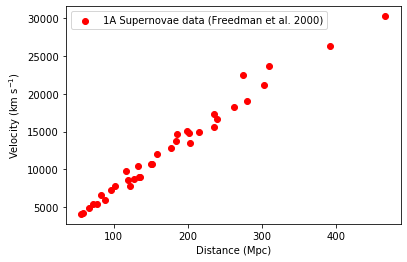

In [3]:
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

## Determining the slope of this line (the Hubble constant)

We have distance on the x-axis inmegaparsecs and velocity on the y-axis in km/s. The slope of this line is the Hubble constant: 

$v = H_o d$

where $v$ is velocity, $d$ is distance, and $H_o$ is the Hubble constant. 

This looks a lot like the equation for a line through the data ($y=mx + b$) where $m$ is the slope and $b$ is the y-intercept.  In this case, the y-intercept should be 0 or nearly so, and $m$ is $H_o$.

So how do we find the slope?

Here is where we can use linear regression to find the "best fit" line through the data. The approach is to minimize the sum of the squares of the distances (residuals) between the points and a line through them. In this illustration below, the residuals are the vertical distance between each data point and the line:

<img src="Images/Residuals_for_Linear_Regression_Fit.png" width=400>

The approach in linear regression is to find the line that minimizes the squared value of these distances all added up. 

<img src="Images/RMSE1.png" width=400>
<img src="Images/RMSE2.png" width=400>
<img src="Images/RMSE3.png" width=400>
<img src="Images/RMSE4.png" width=400>

We determine the best-fit line through this least squares approach using the ```np.polyfit()``` function. A straight line is a first degree polynomial (*note that the function can fit higher order polynomials as well*).

In [4]:
np.polyfit?

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    points sharing the same x-coordinates can be fitted at once by
    passing in a 2D-array that contains one dataset per column.
deg : int
    Degree of the fitting polynomial
rcond : float, optional
    Relative condition number of the fit. Singular values smaller

## Fitting a line with `np.polyfit()`

`np.polyfit()` can be used to calculate best fit lines (setting the degree (```deg```) to 1), or higher order curves (setting degree to 2 or higher) returning the slope and the intercept. Let's put it to use:

In [5]:
np.polyfit(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],1)

array([ 67.5361857 , 711.79566787])

So $H_o$, the slope of the best-fit line, is 67.5 (in the odd units of kilometers per second per megaparsec).  

Let's plot the best fit line on our graph.  

We can assign the best fitting slope and y-intercept from **np.polyfit( )** to a variable (**m_b**).

In [6]:
m_b= np.polyfit(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],1)
print(m_b) #see if that worked

[ 67.5361857  711.79566787]


**m_b**  seems to be an array of coefficients, where the first is the slope and the second is the y-intercept.  

We can now use the function `np.polyval()` which will calculate new y values using the model of a linear fit. We can feed **m_b** into **np.polyval( )**, along with our x array to get a new set of y values which are the y values for the best-fit linear model. Then we can plot the model data as a black line along with the original data. 

In [7]:
model_y_values = np.polyval(m_b,Supernova_data['D(Mpc)'])
model_y_values

array([ 9808.91988211, 11443.29557612, 14124.48214855, 16846.19043239,
        8620.28301373,  4493.82206726, 13131.70021871,  8917.44223082,
       19257.23226199,  7607.24022818,  4628.89443866, 32251.19439131,
       18419.78355927,  6695.50172118, 10936.77418335, 14387.87327279,
       16643.58187528, 12652.19330021,  5972.86453416, 21614.24514304,
       27152.21237071, 19628.68128336, 21202.27441025, 16657.08911242,
       15259.09006836,  8795.87709656, 14374.36603565,  5560.89380137,
        7242.54482538,  9342.92020075,  5223.21287285, 10835.4699048 ,
       13246.5117344 ,  6276.77736982,  9896.71692352,  9673.8475107 ])

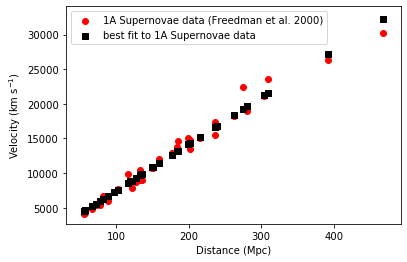

In [8]:
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.scatter(Supernova_data['D(Mpc)'],model_y_values,
         color='black',marker='s',label='best fit to 1A Supernovae data')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

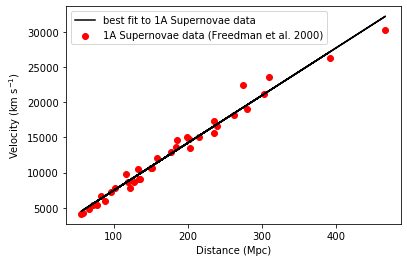

In [9]:
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.plot(Supernova_data['D(Mpc)'],model_y_values,
         color='black',label='best fit to 1A Supernovae data')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

## Using this linear model for prediction

What would we predict that the velocity would be for a supernova that happened to be 350 Mpc?

<font color=goldenrod>**_Code for you to write_**</font>

**Use the ```np.polyval()``` function to come up with what the linear model predicts the velocity would be?**

## Evaluating model fit

We'd also like to know who well this model fits our data (i.e. how correlated the data are). We'll use the $R^{2}$ correlation coefficient for this. $R^{2}$ is zero for uncorrelated data, and 1 for perfectly linear data (so no misfit between the model line and data). We'll use the scipy function `stats.linregress` to compute $R^{2}$. 

In [11]:
from scipy.stats import stats

And use it, to get what is normally called the $R^2$ value, which when 1. represents perfect agreement.

<img src="Images/Correlation_examples.svg" width=900>
> Pearson correlation coefficient between several example X,Y sets. Source: https://en.wikipedia.org/wiki/Correlation_and_dependence

In [12]:
stats.linregress(Supernova_data['D(Mpc)'],Supernova_data['VCMB'])

LinregressResult(slope=67.53618570328341, intercept=711.7956678730334, rvalue=0.9890793847199015, pvalue=7.324802146588665e-30, stderr=1.72589961736366)

In [13]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(Supernova_data['D(Mpc)'],Supernova_data['VCMB'])

In [14]:
rvalue**2

0.978278029277899

Not a bad fit!  We can have confidence that there is a strong correlation between distance and velocity. The universe is expanding.   

## Evaluting the fit through plotting residuals

To see how well the regression performs, the data scientist must measure how far off the estimates are from the actual values. These differences are called *residuals*.

$$
\mbox{residual} ~=~ \mbox{observed value} ~-~ \mbox{regression estimate}
$$

A residual is what's left over – the residue – after estimation. 

Residuals are the vertical distances of the points from the regression line. There is one residual for each point in the scatter plot. The residual is the difference between the observed value of $y$ and the fitted value of $y$, so for the point $(x, y)$,

$$
\mbox{residual} ~~ = ~~ y ~-~
\mbox{fitted value of }y
~~ = ~~ y ~-~
\mbox{height of regression line at }x
$$

In [15]:
residual = Supernova_data['VCMB']-model_y_values

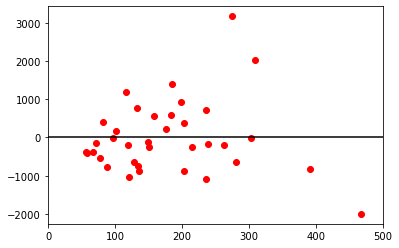

In [16]:
plt.scatter(Supernova_data['D(Mpc)'],residual,color='red')
plt.hlines(0,xmin=0,xmax=500)
plt.xlim(0,500)
plt.show()

**The residual plot of a good regression shows no pattern. The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.**

## Estimating the age of the universe

To calculate the age of the universe, we can use Hubble's law:  

We had $v=H_o d$ as Hubble's law and we know that distance = velocity x time, or,  $d=vt$.  So, if we divide both sides by $v$ and  we get: 

1=$H_o$t. 

Solving for $t$ (the age of the universe), we get 

$t=1/H_o$ [in some weird units.]

In [17]:
t = 1.0/slope
print(t)

0.014806877077622448


But the units are weird (not years, Mpc s/km).  To fix this, we need to know how many kilometers are in a megaparsec.  As it happens,  there are 3.09 x 10$^{19}$ km/Mpc.

So, we can calculate the age of the universe in seconds (**Age_sec**) by converting the megaparsecs to km:

Age (s) = $t \frac{s \cdot Mpc}{km}$ x $3.09 x 10^{19} \frac {km}{Mpc}$

In [18]:
Age_sec=t*3.09e19
print(Age_sec)

4.575325016985336e+17


That's a lot of seconds!  We should convert seconds to years.  Here's another fun fact: there are approximately   $\pi$ x 10$^7$ seconds in a year. 

More precisely, there are 60 (s/min) x 60 (min/hr) x 24 (hr/day) x 365.25 (days/yr)

In [19]:
s_yr=60*60*24*365.25
print('%e'%(s_yr))

3.155760e+07


Ok.  so not exactly $\pi \times 10^7$, but close....  

In [20]:
Age_yrs=Age_sec/s_yr
print(Age_yrs)

14498330091.595484


And now in billions of years:  

In [21]:
print ('Age of the universe (in billions of years):')
print(Age_yrs*1e-9)

Age of the universe (in billions of years):
14.498330091595484


<font color=goldenrod>**_Code for you to write_**</font>

**Write a function that takes in a Hubble constant value and calculates the age of the Universe in billions of year**

In [22]:
def age_of_universe(Hubble_constant):
    
    return age

## Using other data sets to estimate the Hubble constant

Determining the Hubble constant continues to be a major avenue of astrophysical research. In fact, Wendy Freedman's group just published a new study (https://arxiv.org/abs/1907.05922) that is summarized in this short video:

https://www.youtube.com/watch?v=awcnVykOKZY

From that paper here is a visualization of Hubble constant determinations over the past 18 years:

<img src="Images/Hubble_Constant_Time.png" width=600>

Let's look at another data set from the 2000 study to see how different data sets can lead to different answers.

## Tully-Fisher Relation galaxy data
> The total luminosity of a spiral galaxy (corrected to face-on inclination to account for extinction)
is strongly correlated with the galaxy’s maximum (corrected to edge-on inclination) rotation
velocity. This relation, calibrated via the Leavitt Law or TRGB, becomes a powerful means of determining
extragalactic distances (Tully&Fisher 1977, Aaronson et al. 1986, Pierce&Tully 1988,
Giovanelli et al. 1997). The TF relation at present is one of the most widely applied methods for
distance measurements *Freedman and Madore (2010)*

<font color=goldenrod>**_Code for you to write_**</font>

**Import the 'Data/Freedman2000_IBandTullyFisher.csv' file. Make a linear fit to determine the slope between `VCMB` and `D(Mpc)`. Calculate the implied age of the universe from these TF galaxy data alone.**

## Going even further out into the universe

Let's look at new data sets available for the classic Hubble problem.  I found one published by Betoule et al. in 2014 [http://dx.doi.org/10.1051/0004-6361/201423413](http://dx.doi.org/10.1051/0004-6361/201423413).   In this paper, data are plotted using the parameters $z$ and $\mu$ which are related to the red shift velocity and distance.  $z$ is the fractional shift in the spectral wavelength and $\mu$ is related to distance. 

Here is a plot from the Betoule et al. paper: 

<img src="Images/betoule14.png" width=600>

_[Figure from Betoule et al., 2014.]  These data are type Ia supernova from different observation collaborations_  

Notice that they plotted the data on a log scale. (This hides some surprising things.)

It turns out that we have been looking at data that are low-z (that is relatively close and low red shift). We  need to convert $z$ and $\mu$ to distance and velocity to compare to the results we have considered thus far.  

According to [http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/hubble.html](http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/hubble.html)

velocity $v$ (as fraction of the speed of light, $c$) is given by

${v\over c}= \bigl({{(z+1)^2-1}  \over {(z+1)^2+1}}\bigr)$

where $c=3 \times 10^8$m s$^{-1}$.  

And according to the Betoule et al. (2014) paper, $\mu$ relates to distance in parsecs $d$ like this:  

$\mu=5\log(d/10)$.   

Let's read in the data (available from this website:  http://cdsarc.u-strasbg.fr/viz-bin/qcat?J/A+A/568/A22#sRM2.2), which are averages of the data shown in the figure above,and take a peek.  

In [24]:
Betoule_data = pd.read_csv('Data/mu_z.csv',header=1)
Betoule_data.head()

,z,mu
0,0.010,32.953887
1,0.012,33.879003
2,0.014,33.842141
3,0.016,34.118567
4,0.019,34.593446


 
Now we can plot it the same way as the cosmologists did in the paper, using $\mu$ and $\log z$: 

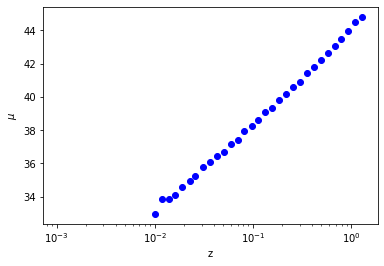

In [25]:
plt.scatter(Betoule_data['z'],Betoule_data['mu'],color='blue')
plt.xlabel('z')
plt.ylabel('$\mu$')
plt.semilogx()
plt.show()

To compare these new data with the previous considered data, we must do the following:  
- Transform $z$  to velocity  
- Transform  $\mu$ to distance using the equations provided. 
- Truncate the new dataset which goes to much farther distances than the 'old' data set

In [26]:
c = 2.9979e8 / 1000 # speed of light in km/s
Betoule_data['velocity'] = c * (((Betoule_data['z']+1.)**2-1.)/((Betoule_data['z']+1.)**2+1.)) # the formula for v from z (and c)
Betoule_data['distance']=10000*(10.**((Betoule_data['mu'])/5.))*1e-9 # convert mu to Gpc

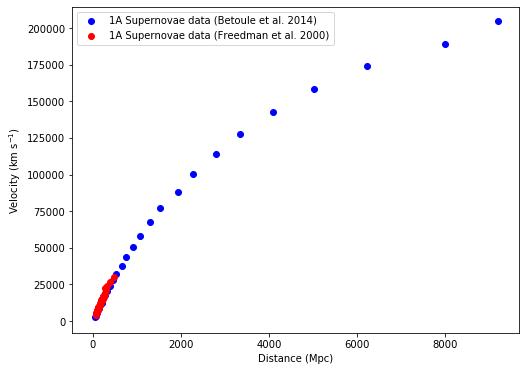

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'],
         color='blue',label='1A Supernovae data (Betoule et al. 2014)')
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

These data sets are similar to one another for the "close" objects, but we can see that a linear model doesn't work well for objects that are at greater distances.

To visualize this reality, let's plot the fit to the Freedman et al. 2000 data atop this plot (applying it to the Betoule distances using `np.polyval()`.

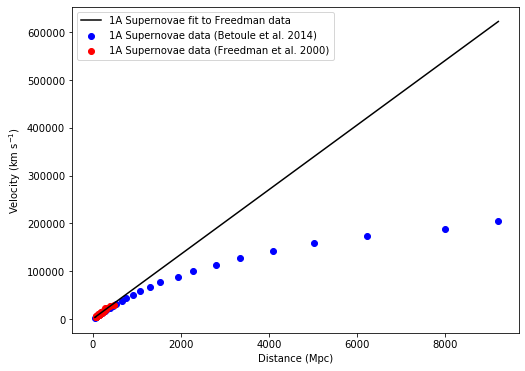

In [28]:
model_y_values = np.polyval(m_b,Betoule_data['distance'])

plt.figure(figsize=(8,6))
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'],
         color='blue',label='1A Supernovae data (Betoule et al. 2014)')
plt.scatter(Supernova_data['D(Mpc)'],Supernova_data['VCMB'],
            color='red',label='1A Supernovae data (Freedman et al. 2000)')
plt.plot(Betoule_data['distance'],model_y_values,
         color='black',label='1A Supernovae fit to Freedman data')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')
plt.legend()
plt.show()

Clearly this fit is quite poor.

Let's make a first-order polynomial fit to all the Betoule data and then plot the residual:

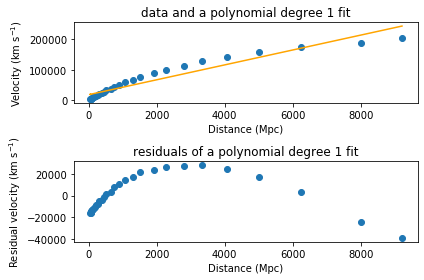

In [29]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],1) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 1 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 1 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

There is a lot of structure to the residual of this degree 1 fit. Let's try a degree 2 polynomial fit (known as quadratic):

$f(x)=ax^2+bx+c$

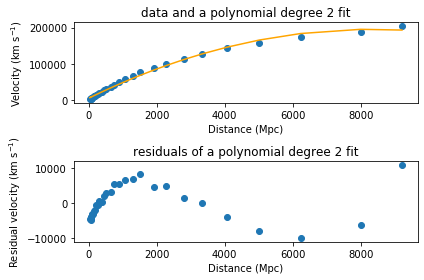

In [30]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],2) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 2 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 2 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

There is a lot of structure to the residuals of this degree 2 fit (and the residuals are still high). Let's try a degree 3 polynomial fit (known as cubic):

$f(x)=ax^3+bx^2+cx+d$

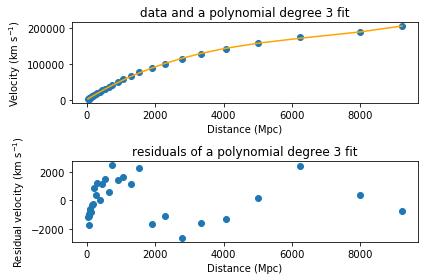

In [31]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],3) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 3 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 3 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

Can a degree 4 polynomial fit do better?

$f(x)=ax^4+bx^3+cx^2+dx+e$

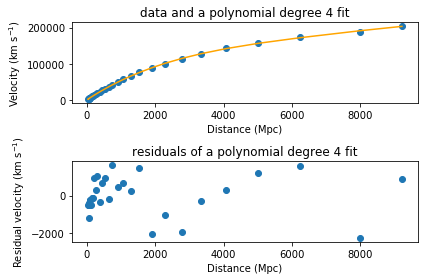

In [32]:
fit = np.polyfit(Betoule_data['distance'],Betoule_data['velocity'],4) 
y_values = np.polyval(fit,Betoule_data['distance'])

plt.subplot(2,1,1)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity'])
plt.plot(Betoule_data['distance'],y_values,color='orange',)
plt.title('data and a polynomial degree 4 fit')
plt.ylabel('Velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.subplot(2,1,2)
plt.scatter(Betoule_data['distance'],Betoule_data['velocity']-y_values)
plt.title('residuals of a polynomial degree 4 fit')
plt.ylabel('Residual velocity (km s$^{-1}$)')
plt.xlabel('Distance (Mpc)')

plt.tight_layout()
plt.show()

That looks about the same as the cubic so might as well stick with that one as a working model.

That the velocity-distance relationship is not linear is taken as evidence that the expansion of the universe is accelerating. This acceleration is attributed to dark energy:

> In a matter-dominated universe, the expansion velocity of the Universe slows down over
time owing to the attractive force of gravity. However, a decade ago two independent groups (Perlmutter et al. 1999, Riess et al. 1998) found that supernovae at z ∼ 0.5 appear to be about 10%
fainter than those observed locally, consistent instead with models in which the expansion velocity
is increasing; that is, a universe that is accelerating in its expansion. Combined with independent
estimates of the matter density, these results are consistent with a universe in which one-third of
the overall density is in the form of matter (ordinary plus dark), and two-thirds is in a form having
a large, negative pressure, termed dark energy. *Freedman and Madore (2010)*